# Importing The Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)


In [4]:
data = pd.read_csv("Stars_Names.csv")
df = data.copy()
df.head()

,Name,Constellation,Bayern Designation,Designation,Approval Date
0,Acamar,Eridanus,θ1 Eridani A,HR 897,2016-07-20
1,Achernar,Eridanus,α Eridani A,HR 472,2016-06-30
2,Achird,Cassiopeia,η Cassiopeiae A,HR 219,2017-09-05
3,Acrab,Scorpius,β1 Scorpii Aa,HR 5984,2016-08-21
4,Acrux,Crux,α Crucis Aa,HR 4730,2016-07-20


# Data Cleaning and Process

In [5]:
df.describe()

,Name,Constellation,Bayern Designation,Designation,Approval Date
count,336,335,335,336,336
unique,336,63,335,336,13
top,Wazn,Ursa Major,β Librae,HR 2040,2016-07-20
freq,1,18,1,1,67


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                336 non-null    object
 1   Constellation       335 non-null    object
 2   Bayern Designation  335 non-null    object
 3   Designation         336 non-null    object
 4   Approval Date       336 non-null    object
dtypes: object(5)
memory usage: 13.3+ KB


Dropping the Duplicates if any

In [7]:
df.drop_duplicates(inplace = True)

## Changing Approved date column(Object) to DateTime column

In [8]:
df['Approval Date'] = pd.to_datetime(df['Approval Date'])

In [9]:
df['year'] = df['Approval Date'].dt.year
df['month'] = df['Approval Date'].dt.month


In [10]:
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
df['MonthName'] = df['month'].map(month_map)
df.drop('month' ,axis = 1,inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                336 non-null    object        
 1   Constellation       335 non-null    object        
 2   Bayern Designation  335 non-null    object        
 3   Designation         336 non-null    object        
 4   Approval Date       336 non-null    datetime64[ns]
 5   year                336 non-null    int32         
 6   MonthName           336 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 17.2+ KB


In [12]:
df=df.rename(columns={'MonthName':'Approval Month'})
df=df.rename(columns={'year':'Approval Year'})
df['Approval Month Number'] = pd.to_datetime(df['Approval Month'], format='%B').dt.month
df

,Name,Constellation,Bayern Designation,Designation,Approval Date,Approval Year,Approval Month,Approval Month Number
0,Acamar,Eridanus,θ1 Eridani A,HR 897,2016-07-20,2016,July,7
1,Achernar,Eridanus,α Eridani A,HR 472,2016-06-30,2016,June,6
2,Achird,Cassiopeia,η Cassiopeiae A,HR 219,2017-09-05,2017,September,9
3,Acrab,Scorpius,β1 Scorpii Aa,HR 5984,2016-08-21,2016,August,8
4,Acrux,Crux,α Crucis Aa,HR 4730,2016-07-20,2016,July,7
5,Acubens,Cancer,α Cancri Aa,HR 3572,2016-07-20,2016,July,7
6,Adhafera,Leo,ζ Leonis Aa,HR 4031,2016-07-20,2016,July,7
7,Adhara,Canis Major,ε Canis Majoris A,HR 2618,2016-08-21,2016,August,8
8,Adhil,Andromeda,ξ Andromedae,HR 390,2016-08-21,2016,August,8
9,Ain,Taurus,ε Tauri Aa1,HR 1409,2015-12-15,2015,December,12


## Removing Null Values

In [13]:
df.isnull().sum()

,0
Name,0
Constellation,1
Bayern Designation,1
Designation,0
Approval Date,0
Approval Year,0
Approval Month,0
Approval Month Number,0


In [14]:
nullRows = df[df.isnull().any(axis=1)]
nullRows

,Name,Constellation,Bayern Designation,Designation,Approval Date,Approval Year,Approval Month,Approval Month Number
78,Asterope,NaN,NaN,HR 1151,2016-08-21,2016,August,8


In [15]:
df.dropna(inplace = True)
df.shape

(335, 8)

##PROBLEMS


**1.Top 10 Constellations by Star Count**

In [16]:
top_10Consellations=df["Constellation"].value_counts().head(10)
top_10Consellations
top_10Constellations_df=top_10Consellations.reset_index()

top_10Constellations_df.columns=["Constellations","Stars Count"]
print("Top 10 Constellations as Per Star count:")
top_10Constellations_df

Top 10 Constellations as Per Star count:


,Constellations,Stars Count
0,Ursa Major,18
1,Draco,16
2,Taurus,15
3,Scorpius,15
4,Eridanus,13
5,Sagittarius,13
6,Virgo,12
7,Pegasus,11
8,Orion,10
9,Gemini,10


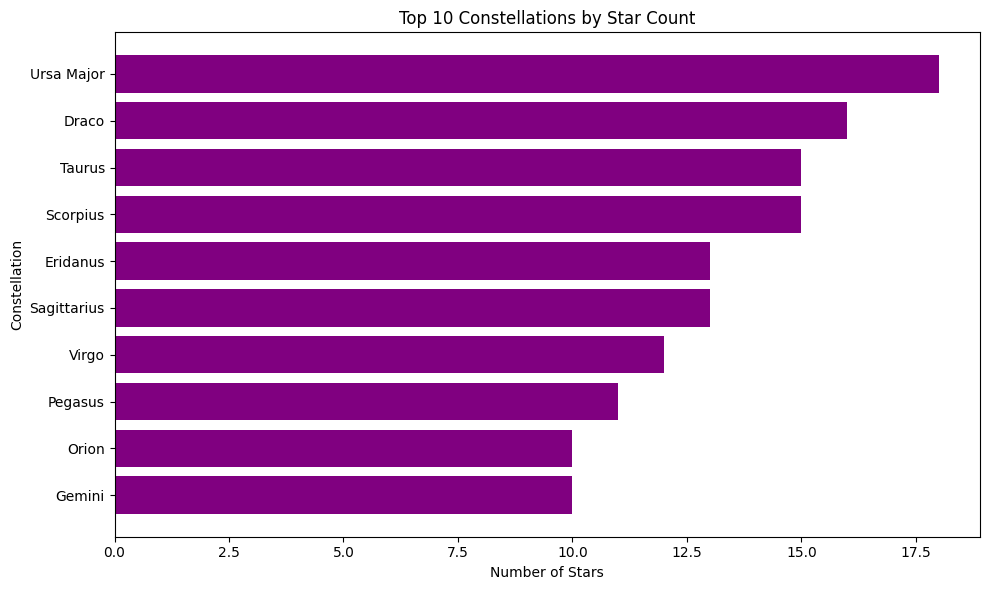

In [17]:
plt.figure(figsize=(10, 6))
plt.barh(top_10Consellations.index, top_10Consellations.values, color='purple')
plt.gca().invert_yaxis()

plt.title('Top 10 Constellations by Star Count')
plt.xlabel('Number of Stars')
plt.ylabel('Constellation')
plt.tight_layout()
plt.show()

**2.Stars Approved per year**

In [18]:
stars_approved_perYear = df['Approval Year'].value_counts()
stars_approved_perYear_df = stars_approved_perYear.reset_index()
stars_approved_perYear_df.columns = ['years', 'Star count']
stars_approved_perYear_df

,years,Star count
0,2016,207
1,2017,86
2,2018,23
3,2015,19


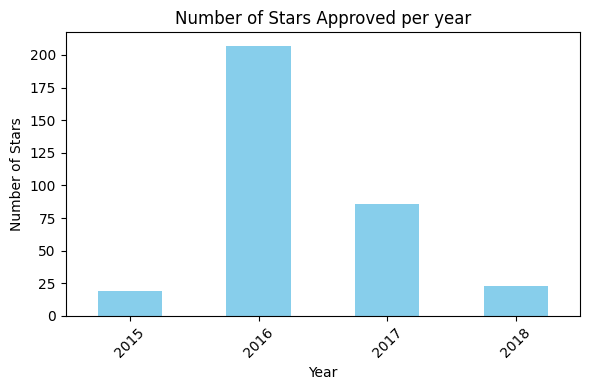

In [19]:
year_counts = df['Approval Year'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
year_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Stars')
plt.title('Number of Stars Approved per year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.Zodiac Star Distribution**

In [20]:
zodiac_signs12 = [
    "Aries", "Taurus", "Gemini", "Cancer", "Leo", "Virgo",
    "Libra", "Scorpius", "Sagittarius", "Capricornus", "Aquarius", "Pisces"
]
zodiac_stars = df[df['Constellation'].isin(zodiac_signs12)]
zodiac_distribution = zodiac_stars['Constellation'].value_counts()
zodiac_distribution_df=zodiac_distribution.reset_index()

zodiac_distribution_df.columns=["zodaic sighns","Stars Count"]

print("Zodiac Star Distribution:")
zodiac_distribution_df

Zodiac Star Distribution:


,zodaic sighns,Stars Count
0,Scorpius,15
1,Taurus,15
2,Sagittarius,13
3,Virgo,12
4,Gemini,10
5,Cancer,9
6,Leo,9
7,Aquarius,8
8,Aries,6
9,Capricornus,5


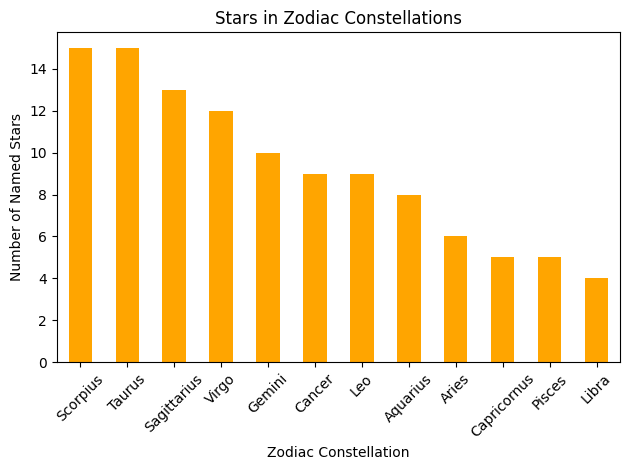

In [21]:
# plt.barh(zodiac_distribution.index, zodiac_distribution.values, color='orange')
# plt.gca().invert_yaxis()
# plt.title("Stars in Zodiac Constellations")
zodiac_distribution.plot(kind='bar', title='Stars in Zodiac Constellations', color='orange')
plt.xlabel('Zodiac Constellation')
plt.ylabel('Number of Named Stars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 *No.of Zodaic and non-zodaic constellations*


In [22]:
df['Zodiac Type'] = df['Constellation'].apply(lambda x: 'Zodiac' if x in zodiac_signs12 else 'Non-Zodiac')
df

,Name,Constellation,Bayern Designation,Designation,Approval Date,Approval Year,Approval Month,Approval Month Number,Zodiac Type
0,Acamar,Eridanus,θ1 Eridani A,HR 897,2016-07-20,2016,July,7,Non-Zodiac
1,Achernar,Eridanus,α Eridani A,HR 472,2016-06-30,2016,June,6,Non-Zodiac
2,Achird,Cassiopeia,η Cassiopeiae A,HR 219,2017-09-05,2017,September,9,Non-Zodiac
3,Acrab,Scorpius,β1 Scorpii Aa,HR 5984,2016-08-21,2016,August,8,Zodiac
4,Acrux,Crux,α Crucis Aa,HR 4730,2016-07-20,2016,July,7,Non-Zodiac
5,Acubens,Cancer,α Cancri Aa,HR 3572,2016-07-20,2016,July,7,Zodiac
6,Adhafera,Leo,ζ Leonis Aa,HR 4031,2016-07-20,2016,July,7,Zodiac
7,Adhara,Canis Major,ε Canis Majoris A,HR 2618,2016-08-21,2016,August,8,Non-Zodiac
8,Adhil,Andromeda,ξ Andromedae,HR 390,2016-08-21,2016,August,8,Non-Zodiac
9,Ain,Taurus,ε Tauri Aa1,HR 1409,2015-12-15,2015,December,12,Zodiac


In [23]:
zodiac_distribution_df['Stars Count'].sum()

np.int64(111)

In [24]:
df['Constellation'].value_counts()

,count
Constellation,
Ursa Major,18
Draco,16
Taurus,15
Scorpius,15
Eridanus,13
Sagittarius,13
Virgo,12
Pegasus,11
Orion,10


In [26]:
df['Zodiac Type'].value_counts()

,count
Zodiac Type,
Non-Zodiac,224
Zodiac,111


In [25]:
df

,Name,Constellation,Bayern Designation,Designation,Approval Date,Approval Year,Approval Month,Approval Month Number,Zodiac Type
0,Acamar,Eridanus,θ1 Eridani A,HR 897,2016-07-20,2016,July,7,Non-Zodiac
1,Achernar,Eridanus,α Eridani A,HR 472,2016-06-30,2016,June,6,Non-Zodiac
2,Achird,Cassiopeia,η Cassiopeiae A,HR 219,2017-09-05,2017,September,9,Non-Zodiac
3,Acrab,Scorpius,β1 Scorpii Aa,HR 5984,2016-08-21,2016,August,8,Zodiac
4,Acrux,Crux,α Crucis Aa,HR 4730,2016-07-20,2016,July,7,Non-Zodiac
5,Acubens,Cancer,α Cancri Aa,HR 3572,2016-07-20,2016,July,7,Zodiac
6,Adhafera,Leo,ζ Leonis Aa,HR 4031,2016-07-20,2016,July,7,Zodiac
7,Adhara,Canis Major,ε Canis Majoris A,HR 2618,2016-08-21,2016,August,8,Non-Zodiac
8,Adhil,Andromeda,ξ Andromedae,HR 390,2016-08-21,2016,August,8,Non-Zodiac
9,Ain,Taurus,ε Tauri Aa1,HR 1409,2015-12-15,2015,December,12,Zodiac


##Hard

1.**KMean clustering(since its a categorical data we use oneHotEncoding)**

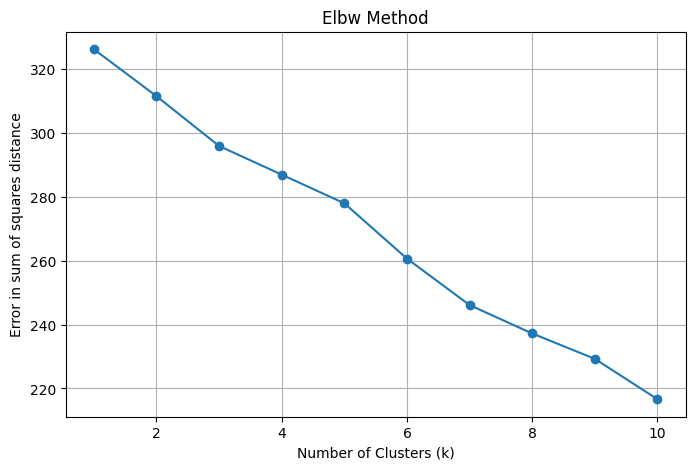

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
cat_data = df[['Constellation']]
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(cat_data)
ssed = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(encoded)
    ssed.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, ssed, marker='o')
plt.title("Elbw Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Error in sum of squares distance")
plt.grid(True)
plt.show()



Constellation_Cluster
0    286
2     16
1     15
4      9
3      9
Name: count, dtype: int64


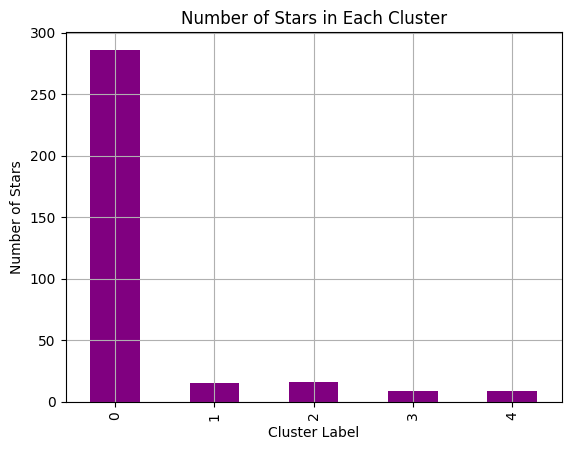

In [28]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Constellation_Cluster'] = kmeans.fit_predict(encoded)
print(df['Constellation_Cluster'].value_counts())

df['Constellation_Cluster'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Number of Stars in Each Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Stars")
plt.grid(True)
plt.show()


In [29]:
print(df['Constellation'].value_counts().sum())
df['Constellation'].value_counts()


335


,count
Constellation,
Ursa Major,18
Draco,16
Taurus,15
Scorpius,15
Eridanus,13
Sagittarius,13
Virgo,12
Pegasus,11
Orion,10


In [30]:
df[['Constellation', 'Constellation_Cluster']].drop_duplicates().sort_values('Constellation_Cluster')

,Constellation,Constellation_Cluster
0,Eridanus,0
2,Cassiopeia,0
3,Scorpius,0
4,Crux,0
8,Andromeda,0
7,Canis Major,0
11,Lyra,0
10,Sagittarius,0
16,Ursa Major,0
15,Corvus,0


In [31]:
df

,Name,Constellation,Bayern Designation,Designation,Approval Date,Approval Year,Approval Month,Approval Month Number,Zodiac Type,Constellation_Cluster
0,Acamar,Eridanus,θ1 Eridani A,HR 897,2016-07-20,2016,July,7,Non-Zodiac,0
1,Achernar,Eridanus,α Eridani A,HR 472,2016-06-30,2016,June,6,Non-Zodiac,0
2,Achird,Cassiopeia,η Cassiopeiae A,HR 219,2017-09-05,2017,September,9,Non-Zodiac,0
3,Acrab,Scorpius,β1 Scorpii Aa,HR 5984,2016-08-21,2016,August,8,Zodiac,0
4,Acrux,Crux,α Crucis Aa,HR 4730,2016-07-20,2016,July,7,Non-Zodiac,0
5,Acubens,Cancer,α Cancri Aa,HR 3572,2016-07-20,2016,July,7,Zodiac,3
6,Adhafera,Leo,ζ Leonis Aa,HR 4031,2016-07-20,2016,July,7,Zodiac,4
7,Adhara,Canis Major,ε Canis Majoris A,HR 2618,2016-08-21,2016,August,8,Non-Zodiac,0
8,Adhil,Andromeda,ξ Andromedae,HR 390,2016-08-21,2016,August,8,Non-Zodiac,0
9,Ain,Taurus,ε Tauri Aa1,HR 1409,2015-12-15,2015,December,12,Zodiac,1


## Graphs

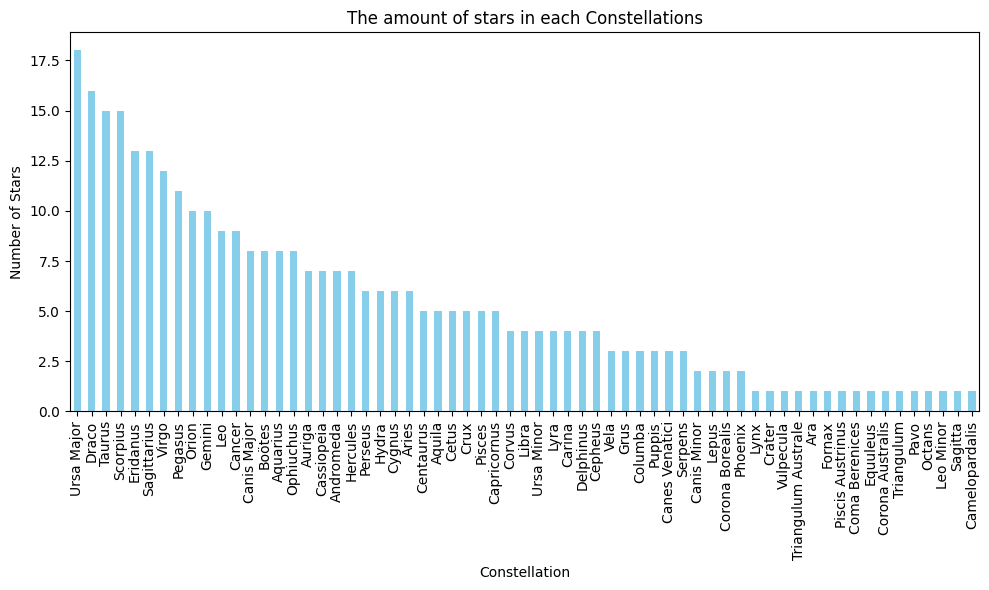

In [32]:
starCount = df.Constellation.value_counts()
plt.figure(figsize=(10, 6))
starCount.plot(kind='bar', color='skyblue')
plt.xlabel('Constellation')
plt.ylabel('Number of Stars')
plt.title('The amount of stars in each Constellations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

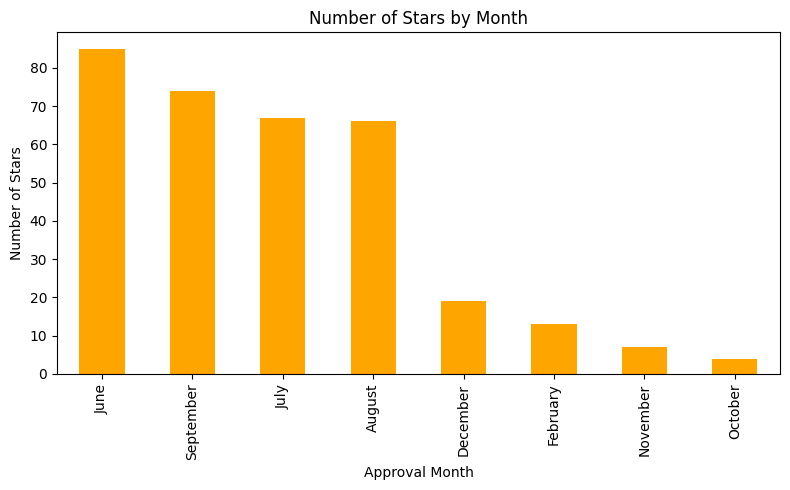

In [33]:
monthCount = df['Approval Month'].value_counts()
plt.figure(figsize=(8, 5))
monthCount.plot(kind='bar', color='orange')
plt.xlabel('Approval Month')
plt.ylabel('Number of Stars')
plt.title('Number of Stars by Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
#This should be in month-wise sequence. The month name should be changed to 'Approval Month' and the year to 'Approval Year', and numbering should also be added.